In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [4]:
retail = pd.read_csv('OnlineRetail.csv', sep="," ,encoding = 'ISO-8859-1',header=0)

In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
retail.shape #return the rows and columns of the dataset

(541909, 8)

In [7]:
retail.info #return the information about the dataset

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

DataCleaning 

In [8]:
#calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail),2)


In [9]:
df_null #showing the colums with teh percentage of missing values

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
# Dropping rows with missing values in the dataset

retail = retail.dropna()


In [11]:
retail.shape

(406829, 8)

In [12]:
#changing data type of customer id
retail['CustomerID'] = retail['CustomerID'].astype(str)

/var/folders/7y/b67bqp9925q4wcsjxbkmf8q00000gn/T/ipykernel_43620/1460487128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['CustomerID'] = retail['CustomerID'].astype(str)


In [13]:
#new Attribute : Monetary
retail['Amount'] = retail ['Quantity']*retail['UnitPrice'] ## muntiplied the unit prize with the quantity
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()


/var/folders/7y/b67bqp9925q4wcsjxbkmf8q00000gn/T/ipykernel_43620/3227178377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Amount'] = retail ['Quantity']*retail['UnitPrice'] ## muntiplied the unit prize with the quantity


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
#New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count() #groups the customer based on the number of transactions made
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
#Merging the two dfs

rfm = pd.merge(rfm_m,rfm_f,on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
#New attribute :Recency

#Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')
retail['InvoiceDate']


/var/folders/7y/b67bqp9925q4wcsjxbkmf8q00000gn/T/ipykernel_43620/614511577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [17]:
#Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

/var/folders/7y/b67bqp9925q4wcsjxbkmf8q00000gn/T/ipykernel_43620/361826971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Diff'] = max_date - retail['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
#compute recency of customer

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
# Extract number of days only

# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days #This code will extract the number of days from the timedelta64 dtype and store it in the 'Diff' column. Then, you can print the first few rows to verify the changes.

# Check the first few rows
print(rfm_p.head())


  CustomerID  Diff
0    12346.0   325
1    12347.0     1
2    12348.0    74
3    12349.0    18
4    12350.0   309


In [21]:
#Merging the datafrmaes to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_p,on='CustomerID', how='inner')
rfm.columns = ['CustomerID','Amount' ,'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


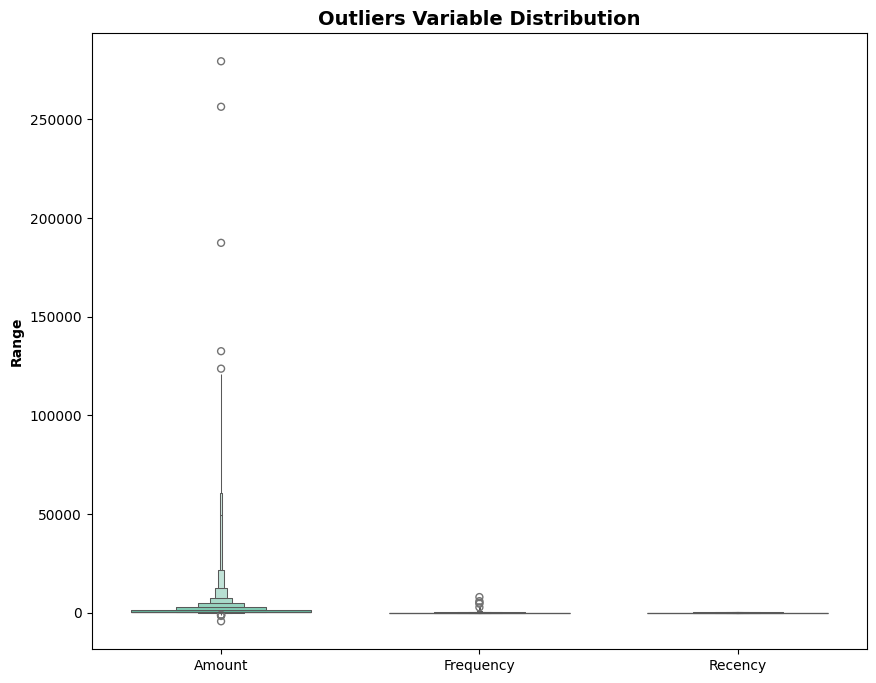

In [22]:
#Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxenplot(data=rfm[attributes], orient='v', palette='Set2', saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.show()


In [23]:
# Removing statical outliers for Amount

Q1=rfm.Amount.quantile(0.05)
Q3=rfm.Amount.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount >=Q1 -1.5*IQR) & (rfm.Amount <=Q3 + 1.5*IQR)]

# Removing statical outliers for Recency

Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency >=Q1 -1.5*IQR) & (rfm.Recency <=Q3 + 1.5*IQR)]

# Removing statical outliers for Frequency

Q1=rfm.Frequency.quantile(0.05)
Q3=rfm.Frequency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency >=Q1 -1.5*IQR) & (rfm.Frequency <=Q3 + 1.5*IQR)]



Scaling the Features
used to scale the data under one scale so eqch range will get teh same priority

In [24]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

#Instantiate
scaler = StandardScaler()#function used to scale

#fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [25]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
#rfm_df_scaled
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


Model Building K-means

In [26]:
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled,)#training data


KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0], dtype=int32)

In [28]:
set(kmeans.labels_)

{0, 1, 2, 3}

Elbow Curve to get the right number of Clusters

this the method to get the right number of Clusters

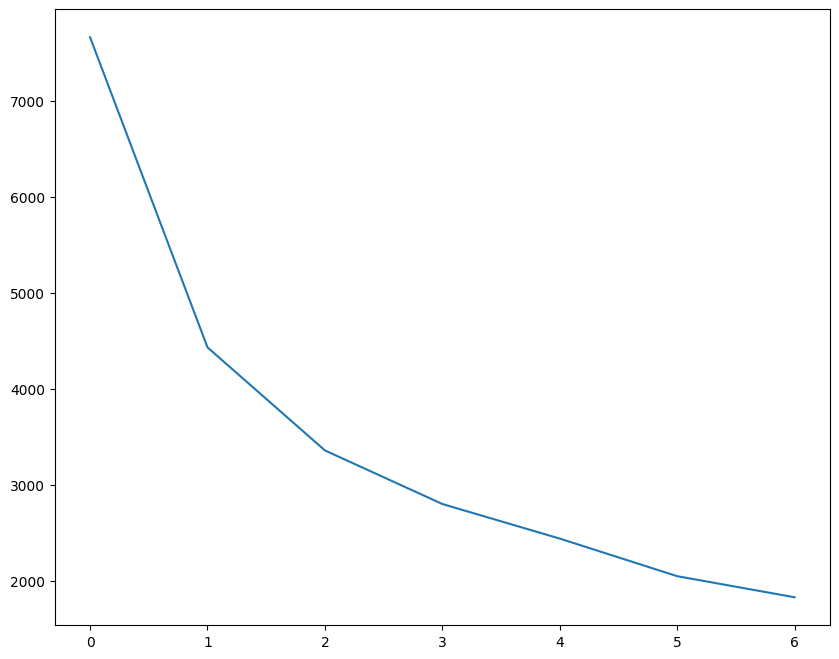

In [29]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)#inertia  gives the sum of squared distances of samples to their closest cluster center.
plt.plot(ssd)

here at 2 or 3 elbow can been seen so we need to take 2 or 3 clusters 

In [30]:
#final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [31]:
#Define filename for pickel File
filename= 'kmeans_model.pkl'
import pickle
#open file in Write mode
with open ('kmeans_saved_model.pkl','wb') as file:
    #Save the kmeans model to the file
    pickle.dump(kmeans,file)

file.close()

pickle.dump(kmeans, open('kmeans_model.pkl','wb'))

In [32]:
from sklearn.cluster import DBSCAN
import numpy as np

# Initialize and fit DBSCAN model
eps = 0.5  # Example value, tune as needed
min_samples = 5  # Example value, tune as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(rfm_df_scaled)

# Retrieve the labels assigned by DBSCAN
dbscan_labels = dbscan.labels_

# Check the unique labels assigned by DBSCAN
set(dbscan_labels)

{-1, 0, 1, 2, 3, 4, 5}

In [33]:
#Define filename for pickel File
filename= 'DB_model.pkl'
import pickle
#open file in Write mode
with open ('DB_saved_model.pkl','wb') as file:
    #Save the kmeans model to the file
    pickle.dump(dbscan,file)

file.close()

pickle.dump(kmeans, open('DB_model.pkl','wb'))